In [ ]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [ ]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

In [ ]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 400,400
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glPointSize(10)
gl.glBegin(gl.GL_POINTS)
gl.glVertex2f(.75,.90 )
gl.glVertex2f(.1, 0)
gl.glEnd()


In [ ]:
import random

# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glPointSize(5)
gl.glBegin(gl.GL_POINTS)

for i in range(25):
  value1 = random.random()
  value2 = random.random()
  gl.glVertex2f(value1,value2 )

for i in range(25):
  value1 = random.random()
  value2 = random.random()
  gl.glVertex2f(-value1,value2 )

gl.glEnd()


In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glBegin(gl.GL_LINES)
gl.glVertex2f(0.75,.80)
gl.glVertex2f(0.1,.8)
gl.glEnd()

In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glBegin(gl.GL_TRIANGLES)
gl.glVertex2f(0.2,0.2)
gl.glVertex2f(0.4,0.4)
gl.glVertex2f(0.6,0.2)
gl.glEnd()
gl.glBegin(gl.GL_LINES)
gl.glVertex2f(0.2,0.2)
gl.glVertex2f(0.2,-0.2)
gl.glVertex2f(0.6,0.2)
gl.glVertex2f(0.6,-0.2)
gl.glVertex2f(0.2,-0.2)
gl.glVertex2f(0.6,-0.2)
gl.glEnd()
gl.glBegin(gl.GL_LINES)
#G - J
gl.glVertex2f(0.25,0.15)
gl.glVertex2f(0.25,0.1)
#G - E
gl.glVertex2f(0.25,0.15)
gl.glVertex2f(0.35,0.15)
#J - K
gl.glVertex2f(0.25,0.1)
gl.glVertex2f(0.35,0.1)
#K - E
gl.glVertex2f(0.35,0.1)
gl.glVertex2f(0.35,0.15)

#H - I
gl.glVertex2f(0.45,0.15)
gl.glVertex2f(0.55,0.15)
#H - L
gl.glVertex2f(0.45,0.15)
gl.glVertex2f(0.45,0.1)
#L - M
gl.glVertex2f(0.45,0.1)
gl.glVertex2f(0.55,0.1)
#I - M
gl.glVertex2f(0.55,0.15)
gl.glVertex2f(0.55,0.1)
gl.glEnd()

gl.glBegin(gl.GL_LINES)
# N - Q
gl.glVertex2f(0.35, -0.05)
gl.glVertex2f(0.45,-0.05)
# 0 - P
gl.glVertex2f(0.35,-0.2)
gl.glVertex2f(0.45,-0.2)
#N - O
gl.glVertex2f(0.35,-0.05)
gl.glVertex2f(0.35,-0.2)
#Q - P
gl.glVertex2f(0.45,-0.05)
gl.glVertex2f(0.45,-0.2)
gl.glEnd()

gl.glPointSize(5)
gl.glBegin(gl.GL_POINTS)
gl.glVertex2f(0.378,-0.1299)
gl.glEnd()


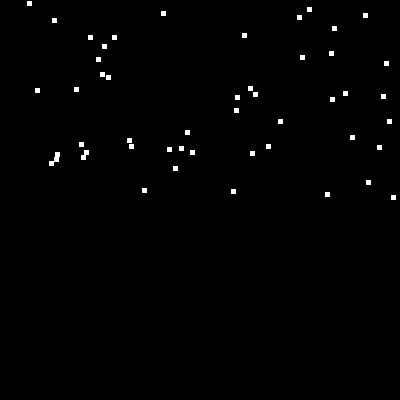

In [ ]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)